In [8]:
import pandas as pd

# Read the CSV f

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,...,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Death_Pct,Pop_Size_Medium,Pop_Size_Large,Metro_status_Non-metro,SVI_CTGY_B,SVI_CTGY_C,SVI_CTGY_D
0,2021-05-31,1001,22,Autauga County,AL,13982,25.0,29.4,32.1,58.2,...,0,0,0,0.005370,0,1,0,1,0,0
1,2021-05-31,1003,22,Baldwin County,AL,64644,29.0,33.6,36.5,65.7,...,0,0,0,0.002240,0,1,0,0,0,0
2,2021-05-31,1005,22,Barbour County,AL,5739,23.2,26.8,29.2,53.0,...,0,0,0,0.012153,1,0,1,0,0,1
3,2021-05-31,1007,22,Bibb County,AL,5131,22.9,26.3,28.5,52.4,...,0,0,0,0.004465,1,0,0,0,1,0
4,2021-05-31,1009,22,Blount County,AL,10659,18.4,21.6,23.7,43.4,...,0,0,0,0.006917,0,1,0,1,0,0


<Axes: >

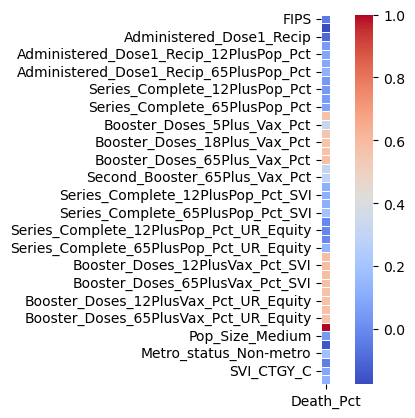

In [24]:

import seaborn as sns
df = pd.read_csv("merged_data_new.csv")

# Compute the correlation matrix
df = df.drop(['Date','Recip_County','Recip_State'], axis=1)
corr_matrix = df.corr()

# Filter the correlation matrix for 'Death_Pct' column
corr_with_death_pct = corr_matrix['Death_Pct']

# Plot the correlations with 'Death_Pct'
sns.heatmap(corr_with_death_pct.to_frame(), cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)


In [17]:
top_corr_features = corr_matrix.nlargest(5, 'Death_Pct')['Death_Pct'].index
print(', '.join(top_corr_features))



Death_Pct, Booster_Doses_18PlusVax_Pct_SVI, Booster_Doses_Vax_Pct_SVI, Booster_Doses_12PlusVax_Pct_SVI, Booster_Doses_65Plus_Vax_Pct


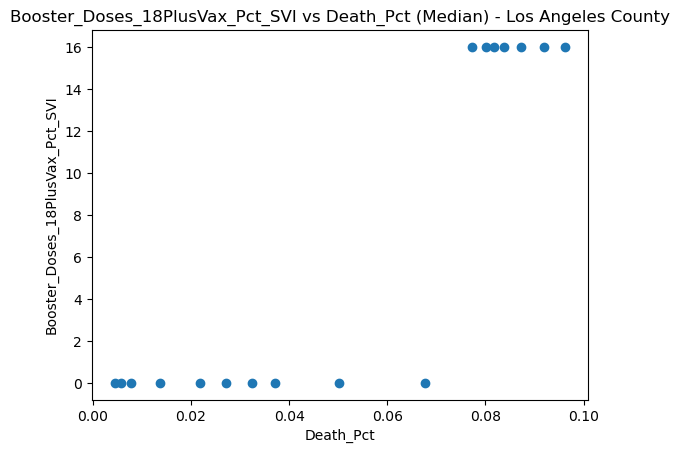

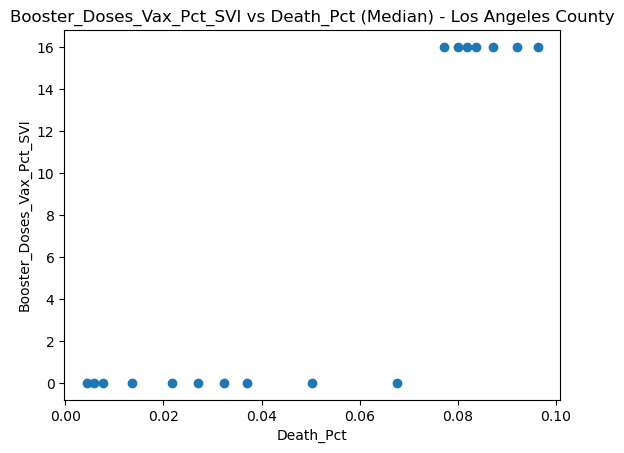

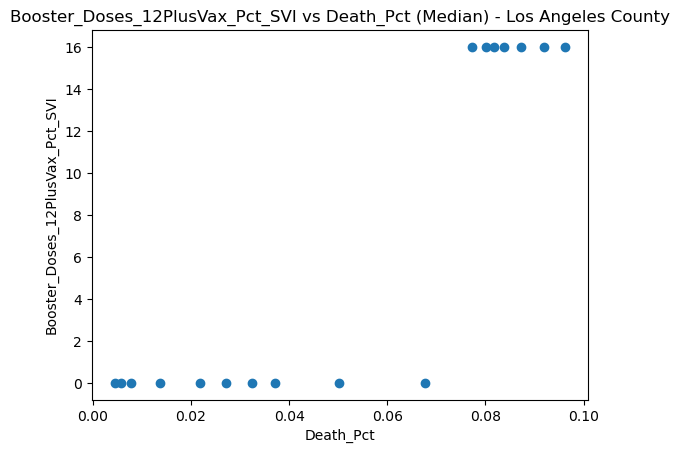

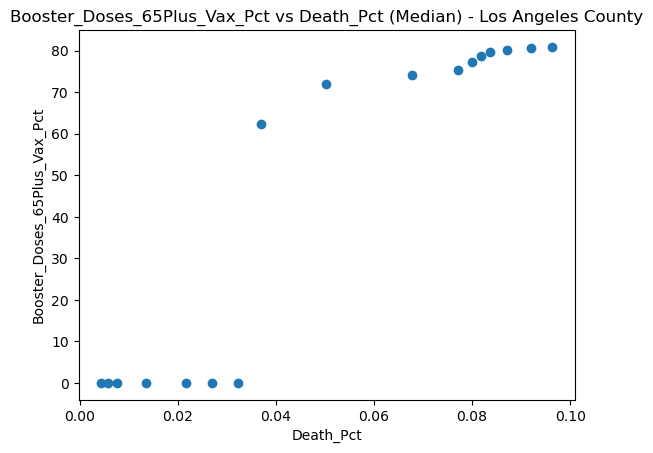

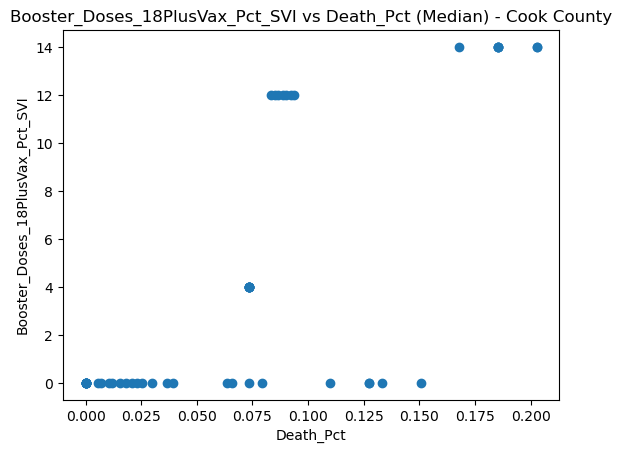

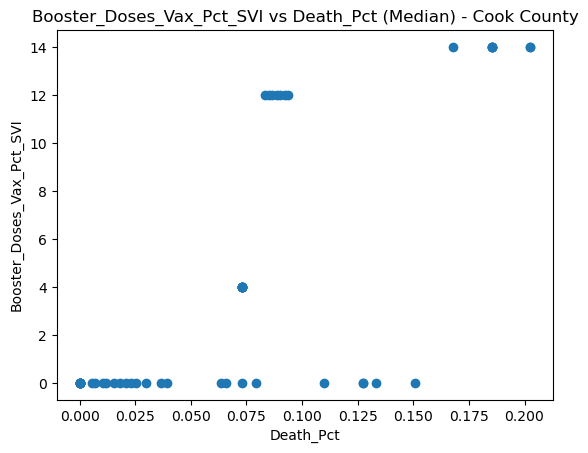

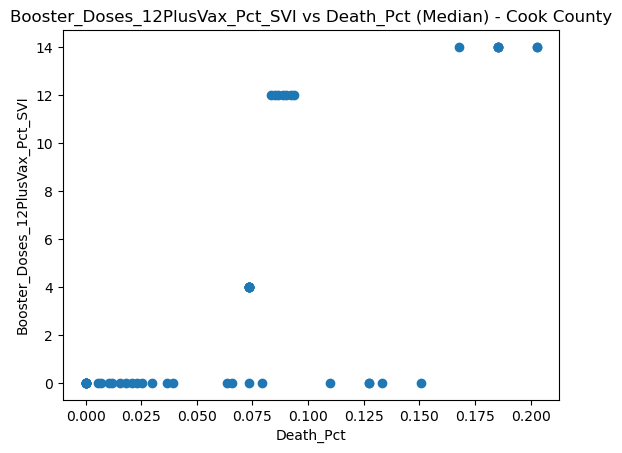

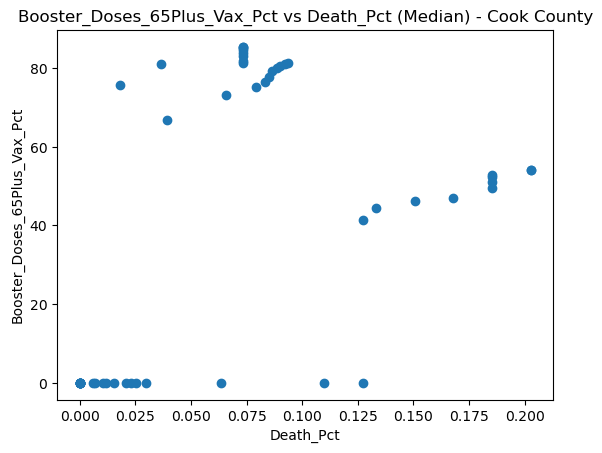

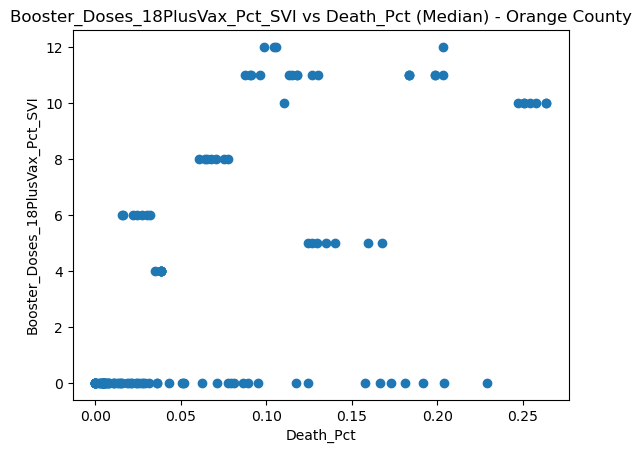

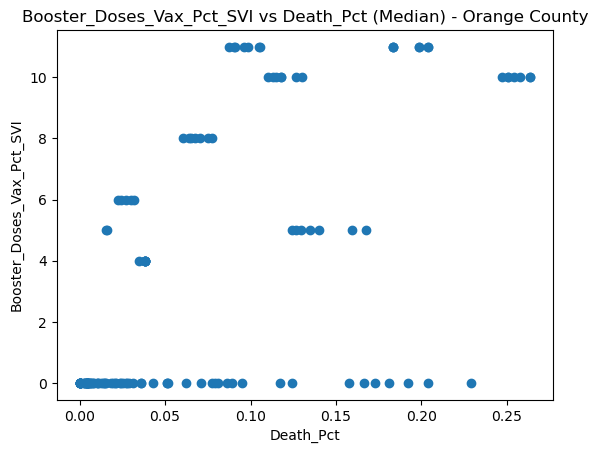

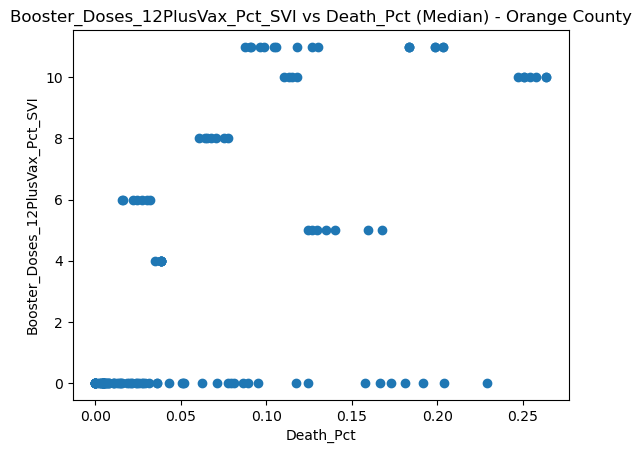

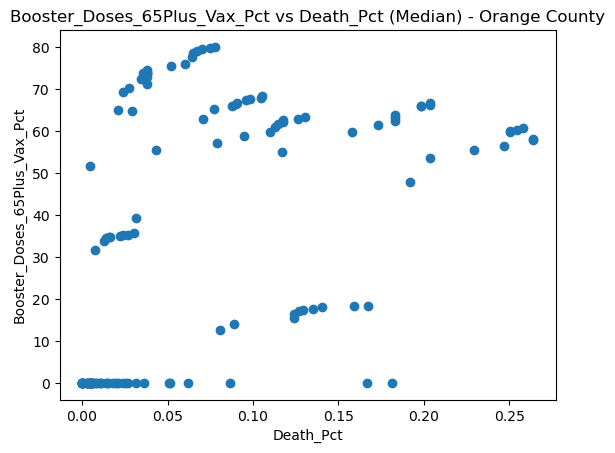

In [32]:
# Aggregate all counties by summing the population
df = pd.read_csv("merged_data_new.csv")
import matplotlib.pyplot as plt
county_population = df.groupby('Recip_County')['Administered_Dose1_Recip'].sum()

# Get the top 3 counties with the highest population
top_counties = county_population.nlargest(3).index

# Filter the dataframe for the top counties
top_county_df = df[df['Recip_County'].isin(top_counties)]

# Plot the graphs for each top county
for county in top_counties:
    county_data = top_county_df[top_county_df['Recip_County'] == county]
    
    plt.scatter(county_data['Death_Pct'], county_data['Booster_Doses_18PlusVax_Pct_SVI'])
    plt.xlabel('Death_Pct')
    plt.ylabel('Booster_Doses_18PlusVax_Pct_SVI')
    plt.title(f'Booster_Doses_18PlusVax_Pct_SVI vs Death_Pct (Median) - {county}')
    plt.show()
    
    plt.scatter(county_data['Death_Pct'], county_data['Booster_Doses_Vax_Pct_SVI'])
    plt.xlabel('Death_Pct')
    plt.ylabel('Booster_Doses_Vax_Pct_SVI')
    plt.title(f'Booster_Doses_Vax_Pct_SVI vs Death_Pct (Median) - {county}')
    plt.show()
    
    plt.scatter(county_data['Death_Pct'], county_data['Booster_Doses_12PlusVax_Pct_SVI'])
    plt.xlabel('Death_Pct')
    plt.ylabel('Booster_Doses_12PlusVax_Pct_SVI')
    plt.title(f'Booster_Doses_12PlusVax_Pct_SVI vs Death_Pct (Median) - {county}')
    plt.show()
    
    plt.scatter(county_data['Death_Pct'], county_data['Booster_Doses_65Plus_Vax_Pct'])
    plt.xlabel('Death_Pct')
    plt.ylabel('Booster_Doses_65Plus_Vax_Pct')
    plt.title(f'Booster_Doses_65Plus_Vax_Pct vs Death_Pct (Median) - {county}')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Death_Pct vs Old_People
plt.scatter(df['Death_Pct'], df['Old_People'])
plt.xlabel('Death Percentage')
plt.ylabel('Number of Old People')
plt.title('Death Percentage vs Number of Old People')
plt.show()
